# Análisis de los datos obtenidos 

Producción del día 20 de Julio de 2015

Los datos del experimento:
* Hora de inicio: 09:56
* Hora final : 10:1 
* $T: 135ºC$
* $V_{min} tractora: 1 mm/s$
* $V_{max} tractora: 3 mm/s$

Se desea comprobar si el filamento que podemos llegar a extruir con el sistema de la tractora puede llegar a ser bueno como para regularlo.

In [1]:
%pylab inline
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [3]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('datos.csv')

In [4]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X','VELOCIDAD']

In [5]:
#Mostramos un resumen de los datos obtenidoss
datos[columns].describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Diametro X,VELOCIDAD
count,203.000000,203.000000
mean,1.595262,1.955665
std,0.253779,1.001486
min,1.080699,1.000000
25%,1.396121,1.000000
50%,1.585374,1.000000
75%,1.809036,3.000000
max,2.193277,3.000000


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

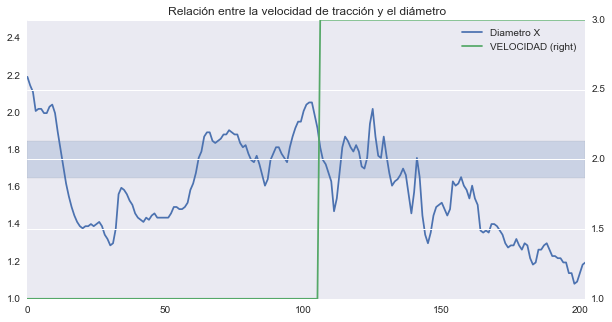

In [6]:
#datos.ix[:, "Diametro X":"Diametro Y"].plot(secondary_y=['VELOCIDAD'],figsize=(16,10),ylim=(0.5,3)).hlines([1.85,1.65],0,3500,colors='r')
graf = datos[columns].plot(secondary_y=['VELOCIDAD'],ylim=(1,2.5),figsize=(10,5),title='Relación entre la velocidad de tracción y el diámetro')
graf.axhspan(1.65,1.85, alpha=0.2)
#datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

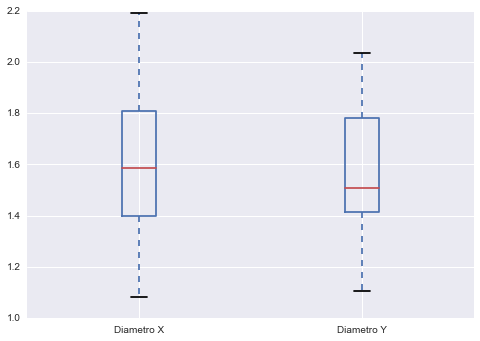

In [7]:
datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

Con esta segunda aproximación se ha conseguido estabilizar los datos. Se va a tratar de bajar ese porcentaje. Como cuarta  aproximación, vamos a  modificar las velocidades de tracción. El rango de velocidades propuesto es de 1.5 a 5.3, manteniendo los incrementos del sistema experto como en el actual ensayo.

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

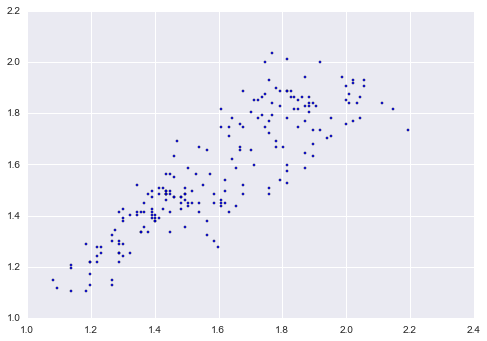

In [8]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [9]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [10]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

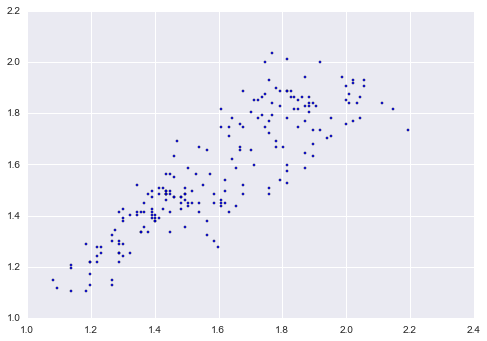

In [11]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [12]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    203.000000
mean       1.018532
std        0.078369
min        0.869402
25%        0.960464
50%        1.007268
75%        1.066282
max        1.263562
dtype: float64

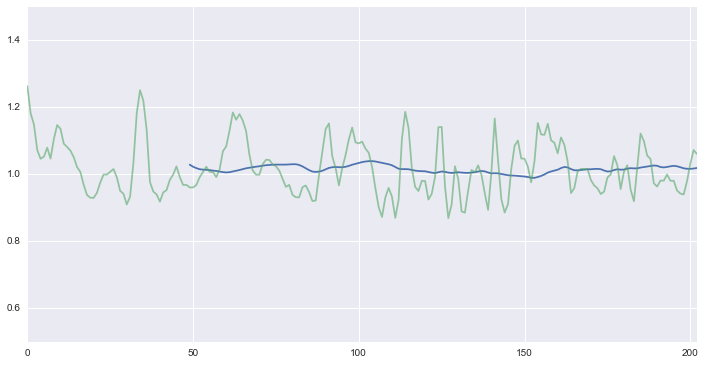

In [13]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))